In [1]:
""""Set Result Root Path"""

roots = dict(
    phantom_2x=dict(
        zf="../logs/ZF/1jo2yzmx/medias",
        cs="../logs/CS/phantom_2x",
        casnet="../logs/CASNET/wk8cz678/medias",
        cunet="../logs/CUNET/1r1zq5yv/medias",
        swtnet="../logs/SWTNET/10jygyr1/medias",
        runet="../logs/RUNET/c210n9ad/medias",
        resunet="../logs/RESUNET/2zoc2096/medias",
        runet_mim="../logs/RUNET/ldisd4ou/medias",
        resunet_mim="../logs/RESUNET/38kkh5r3/medias",
    ),
    phantom_4x=dict(
        zf="../logs/ZF/3iszl2as/medias",
        cs="../logs/CS/cyclebin/phantom_4x_0.01",
        casnet="../logs/CASNET/6qpoz1nf/medias",
        cunet="../logs/CUNET/1mkmo3dq/medias",
        swtnet="../logs/SWTNET/2supomdq/medias",
        runet="../logs/RUNET/2wfq6g6t/medias",
        resunet="../logs/RESUNET/2af3g783/medias",
        runet_mim="../logs/RUNET/3fywadsj/medias",
        resunet_mim="../logs/RESUNET/w9jc76wq/medias",
    ),
    exvivo_2x=dict(
        zf="../logs/ZF/oi5bx8ks/medias",
        cs="../logs/CS/exvivo_2x",
        casnet="../logs/CASNET/2s1y71y9/medias",
        cunet="../logs/CUNET/207l8sq1/medias",
        swtnet="../logs/SWTNET/23afq8cd/medias",
        runet="../logs/RUNET/lcfiyzce/medias",
        resunet="../logs/RESUNET/2sileydm/medias",
        runet_mim="../logs/RUNET/3w1opib7/medias",
        resunet_mim="../logs/RESUNET/jg15wxwz/medias",
    ),
    exvivo_4x=dict(
        zf="../logs/ZF/oftnwat6/medias",
        cs="../logs/CS/exvivo_4x",
        casnet="../logs/CASNET/2qziwh0v/medias",
        cunet="../logs/CUNET/20mdd7vc/medias",
        swtnet="../logs/SWTNET/v3ws90l8/medias",
        runet="../logs/RUNET/3aio63kq/medias",
        resunet="../logs/RESUNET/2fgtfx2m/medias",
        runet_mim="../logs/RUNET/1uadwqv5/medias",
        resunet_mim="../logs/RESUNET/2qqyg8y4/medias",
    )
)

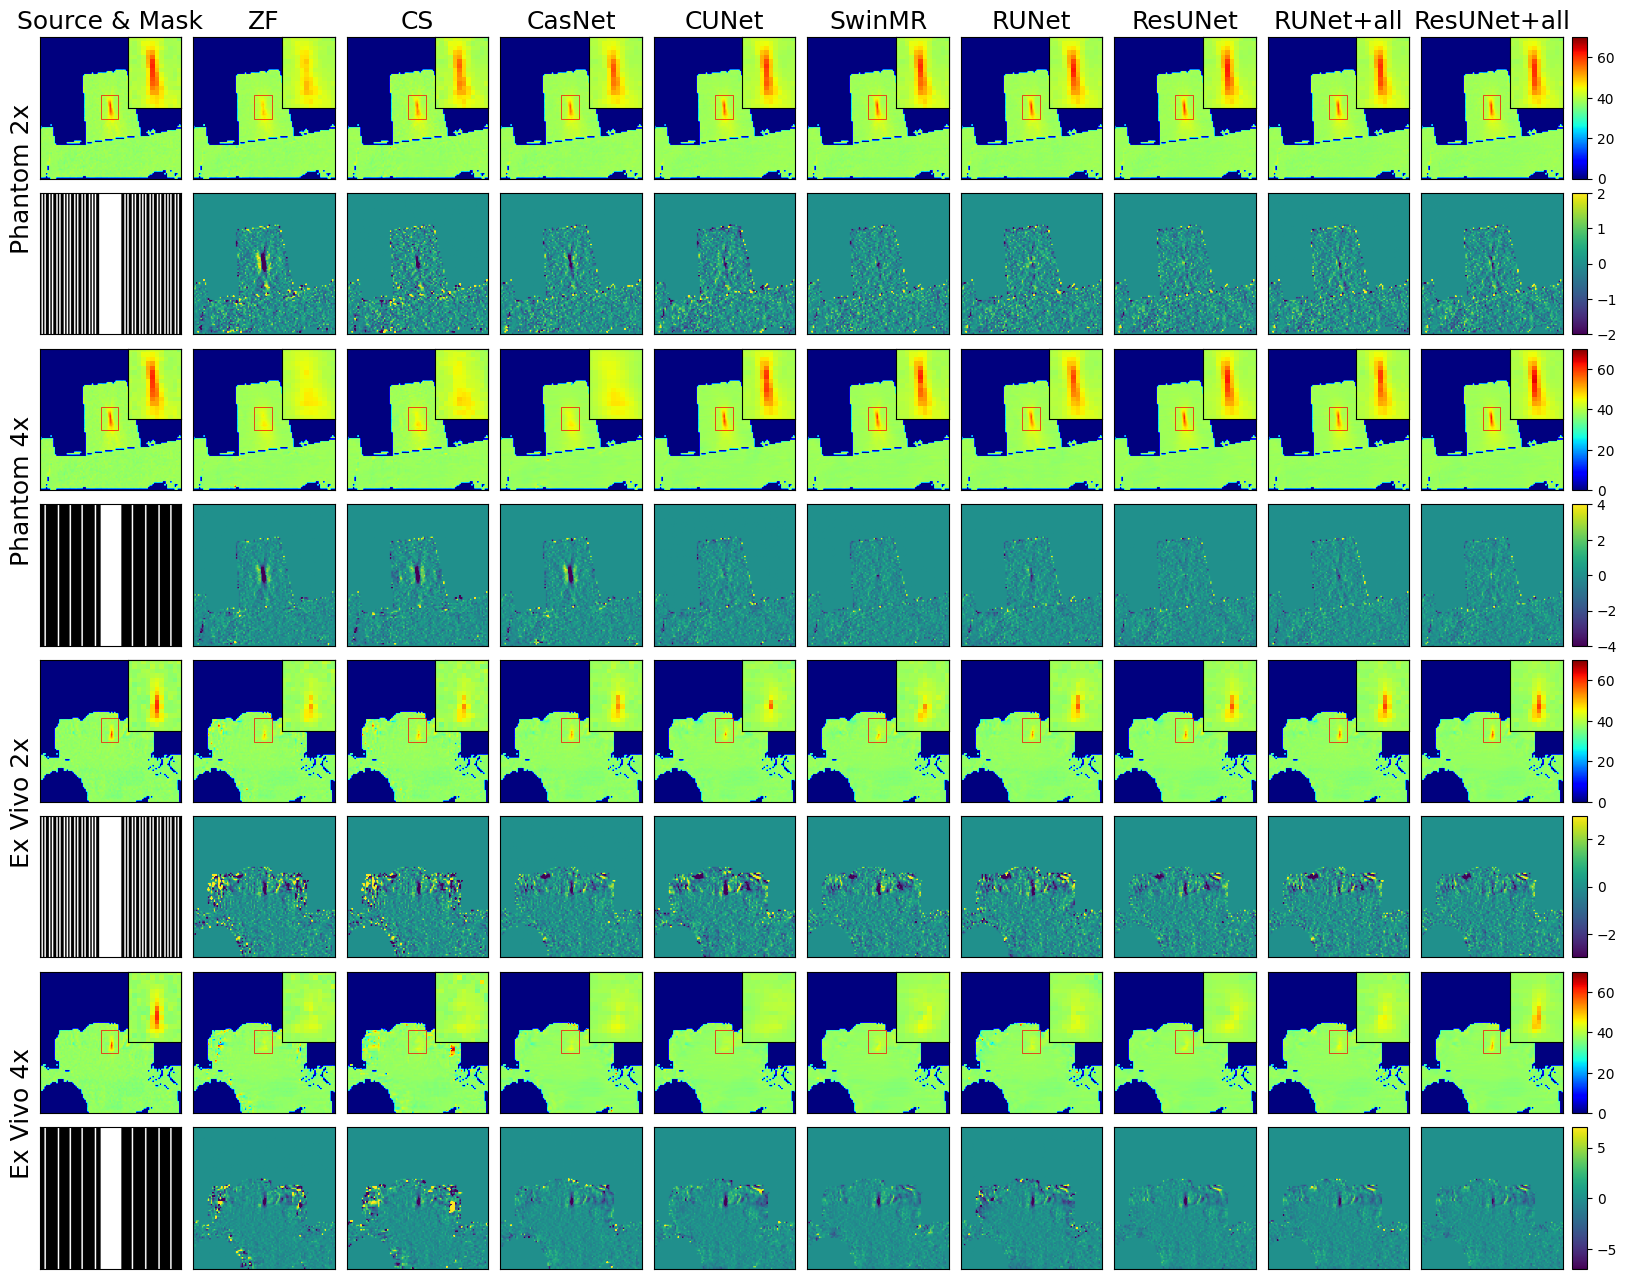

In [3]:
"""Compare Drawing"""

import os
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from fastmrt.data.mask import EquiSpacedMaskFunc
import numpy as np
import matplotlib.pyplot as plt

dataset_types = {"phantom": "FastMRT Dataset V5.0_phantom", "exvivo": "FastMRT Dataset V5.0_exvivo"}
samples = {"phantom": "t01004.h5", "exvivo": "t05016.h5"}
frame_names = {"phantom": ["f9s0c0", "f09s0c0"], "exvivo": ["f8s0c0", "f08s0c0"]}
datas = {}
x_offset, y_offset, rate = 6, 8, 3


# obtain temperature maps
for key, val in roots.items():
    sub_data = {}
    dataset = key.split("_")[0]
    for k, v in val.items():
        file_dir = os.path.join(v, f"{dataset_types[dataset]}_test_{samples[dataset]}_{frame_names[dataset][0]}")
        if os.path.exists(file_dir) is False:
            file_dir = os.path.join(v, f"{dataset_types[dataset]}_test_{samples[dataset]}_{frame_names[dataset][1]}")
        full_tmap = np.load(os.path.join(file_dir, "full_tmap.npy"))
        recon_tmap = np.load(os.path.join(file_dir, "recon_tmap.npy"))
        if dataset == 'phantom':
            full_tmap = full_tmap[::-1, ::-1]
            recon_tmap = recon_tmap[::-1, ::-1]
        sub_data.update({k: {
                "full_tmap": full_tmap,
                "recon_tmap": recon_tmap,
                "patch_recon_tmap": recon_tmap[48 - y_offset : 48 + y_offset, 48 - x_offset : 48 + x_offset]
            }})
    datas.update({key: sub_data})

# obbatin masks and source data
mask_fn2 = EquiSpacedMaskFunc(center_fraction=0.15, acceleration=2)
mask_fn4 = EquiSpacedMaskFunc(center_fraction=0.15, acceleration=4)
mask2, _ = mask_fn2([96, 96])
mask4, _ = mask_fn4([96, 96])
masks = {"2x": np.ones([96, 96]) * mask2, "4x": np.ones([96, 96]) * mask4}

fig = plt.figure(figsize=(20, 16))
fig.subplots_adjust(wspace=0.05, hspace=0.1)
gs = GridSpec(8, 11, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0.1], height_ratios=[1, 1, 1, 1, 1, 1, 1, 1])
vmins = [-2, -4, -3, -7]
vmaxs = [2, 4, 3, 7]
# fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(16+1, 16))


row_orders = ["phantom_2x", "phantom_4x", "exvivo_2x", "exvivo_4x"]
col_orders = ["source & mask", "zf", "cs", "casnet", "cunet", "swtnet", "runet", "resunet", "runet_mim", "resunet_mim"]
row_names = {
    "phantom_2x": "Phantom 2x", 
    "phantom_4x": "Phantom 4x", 
    "exvivo_2x": "Ex Vivo 2x", 
    "exvivo_4x": "Ex Vivo 4x",
}
title_names = {
    "source & mask": "Source & Mask", 
    "zf": "ZF", 
    "cs": "CS", 
    "casnet": "CasNet", 
    "cunet": "CUNet", 
    "swtnet": "SwinMR", 
    "runet": "RUNet", 
    "resunet": "ResUNet", 
    "runet_mim": "RUNet+all", 
    "resunet_mim": "ResUNet+all"
}
for row_idx, row in enumerate(row_orders):
    for col_idx, col in enumerate(col_orders):
        ax1 = fig.add_subplot(gs[row_idx * 2, col_idx])
        ax2 = fig.add_subplot(gs[row_idx * 2+1, col_idx])
        axins = ax1.inset_axes([(96- 2 * x_offset * rate) / 96, (96 - 2 * y_offset * rate) / 96, 
                                (2 * x_offset * rate) / 96, (2 * y_offset * rate) / 96])
        if row_idx == 0:
            ax1.set_title(f"{title_names[col_orders[col_idx]]}", fontsize=18)
        if col_idx == 0:
            ax1.set_ylabel(row_names[row_orders[row_idx]], y=-0, fontsize=18)
            ax1.imshow(datas[row]["zf"]["full_tmap"], vmin=0, vmax=70, cmap="jet")
            ax2.imshow(masks[row.split("_")[-1]], cmap="gray")
            # ax2.axis("off")
            axins.imshow(datas[row]["zf"]["full_tmap"][48 - y_offset : 48 + y_offset, 48 - x_offset : 48 + x_offset], vmin=0, vmax=70, cmap="jet")
        else:
            err = datas[row][col]["recon_tmap"] - datas[row][col]["full_tmap"]
            im1 = ax1.imshow(datas[row][col]["recon_tmap"], vmin=0, vmax=70, cmap="jet")
            im2 = ax2.imshow(err, vmin=vmins[row_idx], vmax=vmaxs[row_idx], cmap="viridis")
            axins.imshow(datas[row][col]["patch_recon_tmap"], vmin=0, vmax=70, cmap="jet")
        ax1.add_patch(patches.Rectangle((48 - x_offset-1, 48 - y_offset-1), 2*x_offset, 2*y_offset, linewidth=0.5, edgecolor='r', facecolor='none'))
            
        # clear ticks
        axins.set_xticks([])
        axins.set_yticks([])
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])

    cax1 = fig.add_subplot(gs[row_idx * 2, -1])
    cax2 = fig.add_subplot(gs[row_idx * 2+1, -1])
    cbar1 = plt.colorbar(im1, cax=cax1)
    cbar2 = plt.colorbar(im2, cax=cax2)

(198, 9)
['ZF', 'CS', 'CasNet', 'CUNet', 'SwinMR', 'RUNet', 'ResUNet', 'RUNet+all', 'ResUNet+all']


<Figure size 640x480 with 0 Axes>

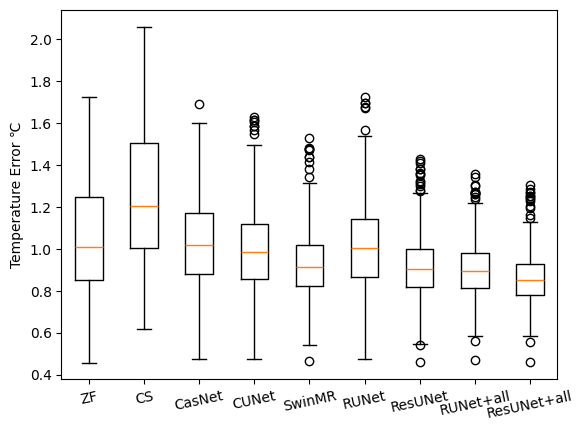

In [2]:
"""Show BoxPlot Figure"""

import os
import numpy as np
import matplotlib.pyplot as plt

datas = {}
for key, val in roots["phantom_4x"].items():
    folders = os.listdir(val)
    datas.update({key: {"full_tmap": [], "recon_tmap": []}})
    for folder in folders:
        if '.json' in folder:
            continue
        full_tmap = np.load(os.path.join(val, folder, "full_tmap.npy"))
        recon_tmap = np.load(os.path.join(val, folder, "recon_tmap.npy"))
        datas[key]["full_tmap"].append(full_tmap)
        datas[key]["recon_tmap"].append(recon_tmap)


# parameters
tmap_num = len(datas)
tmap_height, tmap_width = 96, 96
patch_height, patch_width = 24, 24
patch_error_std, patch_error_mae = 0, 0

title_names = {
    "source & mask": "Source & Mask", 
    "zf": "ZF", 
    "cs": "CS", 
    "casnet": "CasNet", 
    "cunet": "CUNet", 
    "swtnet": "SwinMR", 
    "runet": "RUNet", 
    "resunet": "ResUNet", 
    "runet_mim": "RUNet+all", 
    "resunet_mim": "ResUNet+all"
}

# calculate metrics

errors = []
keys = []
for key, val in datas.items():
    full_tmaps = val["full_tmap"]
    recon_tmaps = val["recon_tmap"]

    error = []
    for full_tmap, recon_tmap in zip(full_tmaps, recon_tmaps):
        patch_full_tmap = full_tmap[(tmap_height - patch_height) // 2: tmap_height - (tmap_height - patch_height) // 2,
                                    (tmap_width - patch_width) // 2: tmap_width - (tmap_width - patch_width) // 2]
        mask = (patch_full_tmap > 43).flatten()
        patch_recon_tmap = recon_tmap[(tmap_height - patch_height) // 2: tmap_height - (tmap_height - patch_height) // 2,
                                        (tmap_width - patch_width) // 2: tmap_width - (tmap_width - patch_width) // 2]
        # error.append(np.abs(patch_full_tmap.flatten()[mask] - patch_recon_tmap.flatten()[mask]).reshape([-1, 1]))
        # error.append(np.abs(patch_full_tmap.flatten() - patch_recon_tmap.flatten()).reshape([-1, 1]))
        error.append(np.mean(np.abs(patch_full_tmap.flatten() - patch_recon_tmap.flatten())).reshape([-1, 1]))
    errors.append(np.concatenate(error, axis=0))
    keys.append(title_names[key])
errors[1] = errors[1][:errors[0].shape[0]]
errors = np.concatenate(errors, axis=1)

plt.clf()
fig, ax = plt.subplots()
ax.boxplot(errors)
ax.set_xticklabels(keys, rotation=12)
ax.set_ylabel('Temperature Error ℃')
# ax.set_title('Box plot of random data')
plt.show()

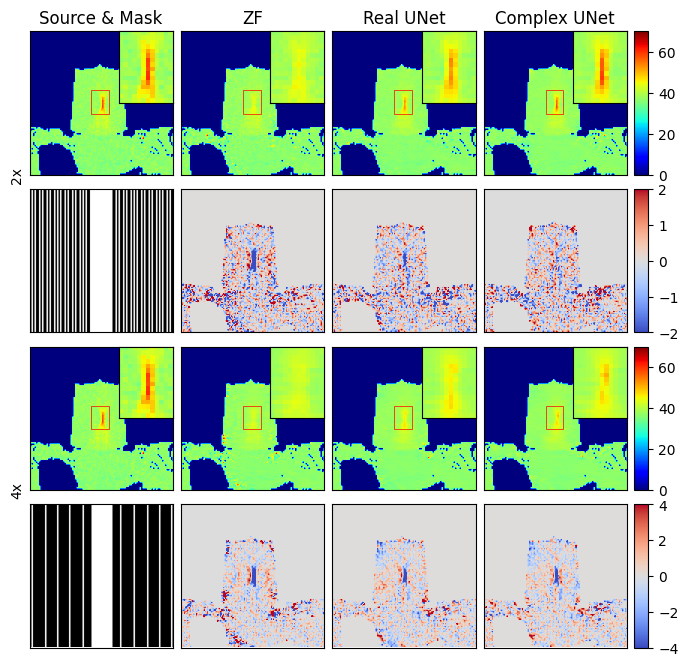

In [5]:
"""Compare Drawing Complex UNet"""

import os
from matplotlib.gridspec import GridSpec
import matplotlib.patches as patches
from fastmrt.data.mask import EquiSpacedMaskFunc

dataset_types = {"phantom": "FastMRT Dataset V5.0_phantom", "exvivo": "FastMRT Dataset V5.0_exvivo"}
samples = {"phantom": "t12007.h5"}
frame_names = {"phantom": ["f12s0c0", "f12s0c0"]}
datas = {}
x_offset, y_offset, rate = 6, 8, 3


# obtain temperature maps
for key, val in roots.items():
    sub_data = {}
    dataset = key.split("_")[0]
    if dataset == "exvivo":
        continue
    for k, v in val.items():
        file_dir = os.path.join(v, f"{dataset_types[dataset]}_test_{samples[dataset]}_{frame_names[dataset][0]}")
        if os.path.exists(file_dir) is False:
            file_dir = os.path.join(v, f"{dataset_types[dataset]}_test_{samples[dataset]}_{frame_names[dataset][1]}")
        full_tmap = np.load(os.path.join(file_dir, "full_tmap.npy"))
        recon_tmap = np.load(os.path.join(file_dir, "recon_tmap.npy"))
        # if dataset == 'phantom':
        #     full_tmap = full_tmap[::-1, ::-1]
        #     recon_tmap = recon_tmap[::-1, ::-1]
        sub_data.update({k: {
                "full_tmap": full_tmap,
                "recon_tmap": recon_tmap,
                "patch_recon_tmap": recon_tmap[48 - y_offset : 48 + y_offset, 48 - x_offset : 48 + x_offset]
            }})
    datas.update({key: sub_data})

# obbatin masks and source data
mask_fn2 = EquiSpacedMaskFunc(center_fraction=0.15, acceleration=2)
mask_fn4 = EquiSpacedMaskFunc(center_fraction=0.15, acceleration=4)
mask2, _ = mask_fn2([96, 96])
mask4, _ = mask_fn4([96, 96])
masks = {"2x": np.ones([96, 96]) * mask2, "4x": np.ones([96, 96]) * mask4}

# draw
fig = plt.figure(figsize=(8, 8))
fig.subplots_adjust(wspace=0.05, hspace=0.1)
gs = GridSpec(4, 5, figure=fig, width_ratios=[1, 1, 1, 1, 0.1], height_ratios=[1, 1, 1, 1])
vmins = [-2, -4]
vmaxs = [2, 4]
# fig, ax = plt.subplots(nrows=8, ncols=8, figsize=(16+1, 16))


row_orders = ["phantom_2x", "phantom_4x"]
col_orders = ["source & mask", "zf", "runet", "cunet"]
row_names = {
    "phantom_2x": "2x", 
    "phantom_4x": "4x", 
}
title_names = {
    "source & mask": "Source & Mask", 
    "zf": "ZF", 
    "runet": "Real UNet",
    "cunet": "Complex UNet", 
}
for row_idx, row in enumerate(row_orders):
    for col_idx, col in enumerate(col_orders):
        ax1 = fig.add_subplot(gs[row_idx * 2, col_idx])
        ax2 = fig.add_subplot(gs[row_idx * 2+1, col_idx])
        axins = ax1.inset_axes([(96- 2 * x_offset * rate) / 96, (96 - 2 * y_offset * rate) / 96, 
                                (2 * x_offset * rate) / 96, (2 * y_offset * rate) / 96])
        if row_idx == 0:
            ax1.set_title(f"{title_names[col_orders[col_idx]]}")
        if col_idx == 0:
            ax1.set_ylabel(row_names[row_orders[row_idx]], y=-0)
            ax1.imshow(datas[row]["zf"]["full_tmap"], vmin=0, vmax=70, cmap="jet")
            ax2.imshow(masks[row.split("_")[-1]], cmap="gray")
            axins.imshow(datas[row]["zf"]["full_tmap"][48 - y_offset : 48 + y_offset, 48 - x_offset : 48 + x_offset], vmin=0, vmax=70, cmap="jet")
        else:
            err = datas[row][col]["recon_tmap"] - datas[row][col]["full_tmap"]
            im1 = ax1.imshow(datas[row][col]["recon_tmap"], vmin=0, vmax=70, cmap="jet")
            im2 = ax2.imshow(err, vmin=vmins[row_idx], vmax=vmaxs[row_idx], cmap="coolwarm")
            axins.imshow(datas[row][col]["patch_recon_tmap"], vmin=0, vmax=70, cmap="jet")
        ax1.add_patch(patches.Rectangle((48 - x_offset-1, 48 - y_offset-1), 2*x_offset, 2*y_offset, linewidth=0.5, edgecolor='r', facecolor='none'))
            
        # clear ticks
        axins.set_xticks([])
        axins.set_yticks([])
        ax1.set_xticks([])
        ax1.set_yticks([])
        ax2.set_xticks([])
        ax2.set_yticks([])

    cax1 = fig.add_subplot(gs[row_idx * 2, -1])
    cax2 = fig.add_subplot(gs[row_idx * 2+1, -1])
    cbar1 = plt.colorbar(im1, cax=cax1)
    cbar2 = plt.colorbar(im2, cax=cax2)
    # plt.savefig("cunet_compare.png")